# Implementing Agglomerative Clustering

## Importing preliminary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## General observation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Statistical Summary

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Renaming the columns

In [13]:
df.rename(columns = {"CustomerID": "customerid",
                    "Name": "name",
                    "Age": "age",
                    "Annual Income(k$)": "annual_income",
                    "Spending Score(1-100)": "spending_score"}, inplace=True)

In [15]:
df.head()

,customerid,Gender,age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.rename(columns = {"Gneder": "gender",
                     "Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)": "spending_score"}, inplace=True)

In [19]:
df.head()

,customerid,Gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.rename(columns={"Gender": "gender"}, inplace=True)

In [23]:
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Visualizing data distribution

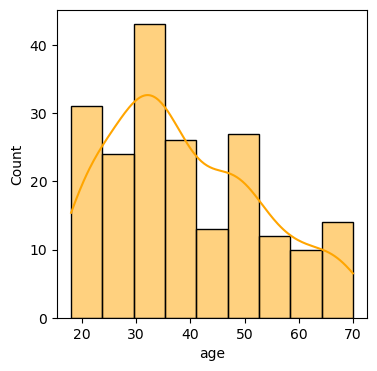

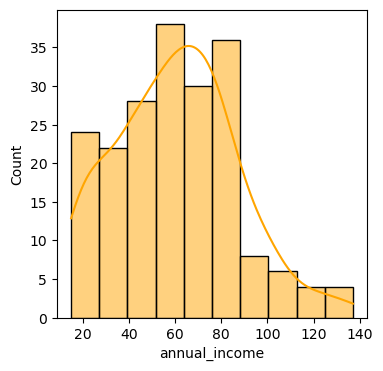

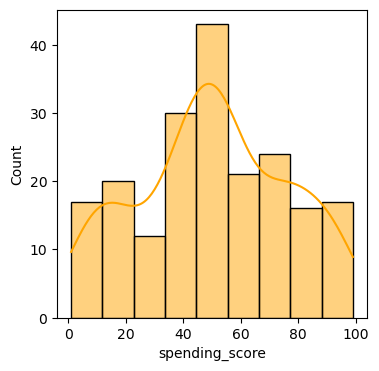

In [31]:
cols = ["age", "annual_income", "spending_score"]
for col in cols:
    plt.figure(figsize=(4,4))
    sns.histplot(df[col], kde=True, color="orange")

## Visualizing Scatter plots

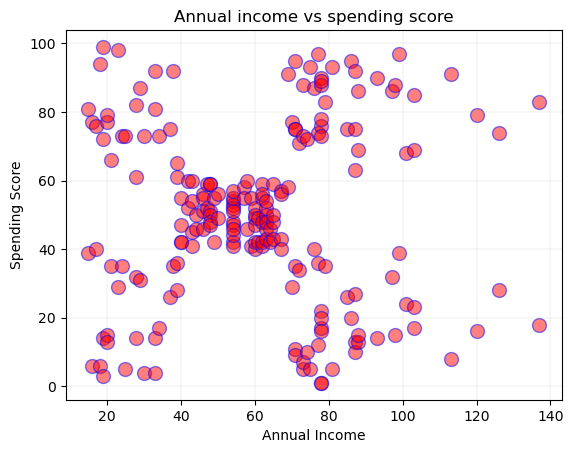

In [51]:
plt.scatter(df["annual_income"], df["spending_score"], color='red', alpha=0.5, edgecolors='b', s=100)
plt.title("Annual income vs spending score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True, linewidth=0.2, alpha=0.7)
plt.show()

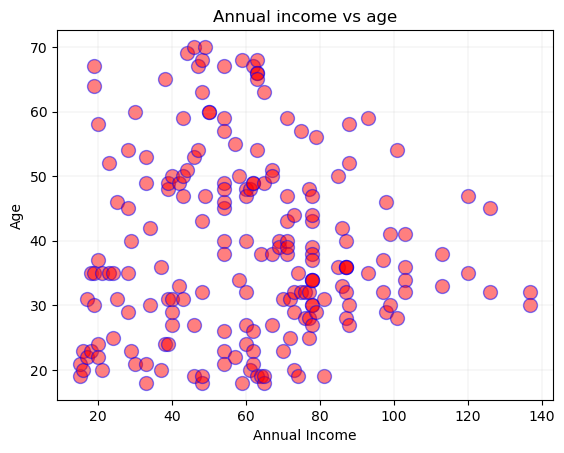

In [53]:
plt.scatter(df["annual_income"], df["age"], color='red', alpha=0.5, edgecolors='b', s=100)
plt.title("Annual income vs age")
plt.xlabel("Annual Income")
plt.ylabel("Age")
plt.grid(True, linewidth=0.2, alpha=0.7)
plt.show()

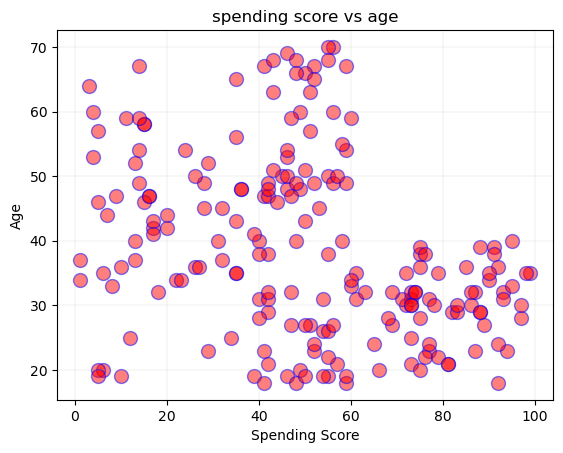

In [55]:
plt.scatter(df["spending_score"], df["age"], color='red', alpha=0.5, edgecolors='b', s=100)
plt.title("spending score vs age")
plt.xlabel("Spending Score")
plt.ylabel("Age")
plt.grid(True, linewidth=0.2, alpha=0.7)
plt.show()

**From the scatter plot, the plot of annual income vs spending score gives us a clear indication of clusters**

**The data points in the remaining combination of columns are too fuzzy and no clear division in clusters is visible**

**Hence, we will only take annual income and spending score columns for our clustering algorithm**

In [87]:
X = df.iloc[:,[3,4]].values

In [89]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Plotting Dendrogram

In [63]:
import scipy.cluster.hierarchy as sch

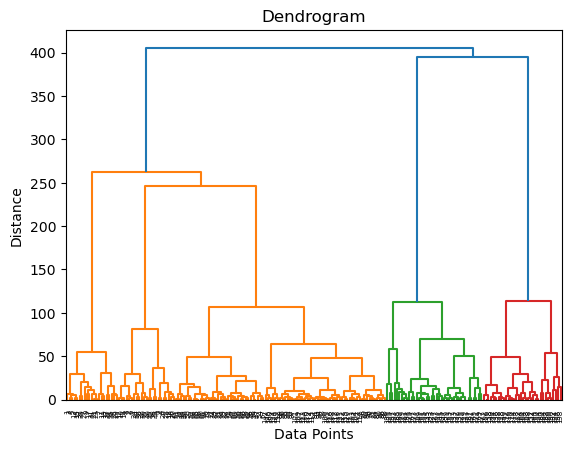

In [91]:
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

**It is nearly impossible to determine the value of k from this Dendrogram**

**From our earlier scatter plot, five clusters seemed evident**

**So, we will take k=5 and observe the result**

## Implementing Agglomerative Clustering

In [69]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_hc = hc.fit_predict(X)

In [95]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

## Plotting Clustered data points

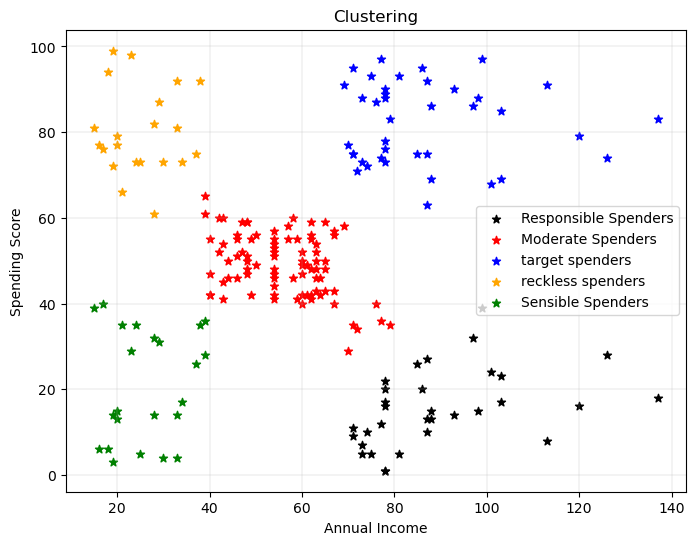

In [118]:

plt.figure(figsize=(8,6))
clusters = {
    0:("black","Responsible Spenders"),
    1:("red","Moderate Spenders"),
    2:("blue","target spenders"),
    3:("orange","reckless spenders"),
    4:("green","Sensible Spenders"),
}



for cluster, (color, label) in clusters.items():
    mask=y_hc==cluster
    plt.scatter(X[mask, 0], X[mask,1], c=color, label=label, marker="*")

#plt.scatter(X[mask,"annual_income"], X[mask, "spending_score"], c=color, label=label) 
#This code will work if we had taken X=df.ilo[:,[3,4]] instead of X=df.ilo[:,[3,4]].values
#When we write .values, our pandas dataframe is converted into a numpy array
#X[mask,0], [rows, columns] indexing is possible only in numpy, not in pandas

plt.title("Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid(True, linewidth=0.2)